# Support Vector Machines and Kernels

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
file_path='C:\IntelPython3\projects\Wine_Quality_Data.csv'
data= pd.read_csv(file_path)

In [2]:
data.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [3]:
data.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
color                   False
dtype: bool

## Answer 1

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [4]:
data['color']=data['color'].transform(lambda x: 1 if x=='red' else 0)

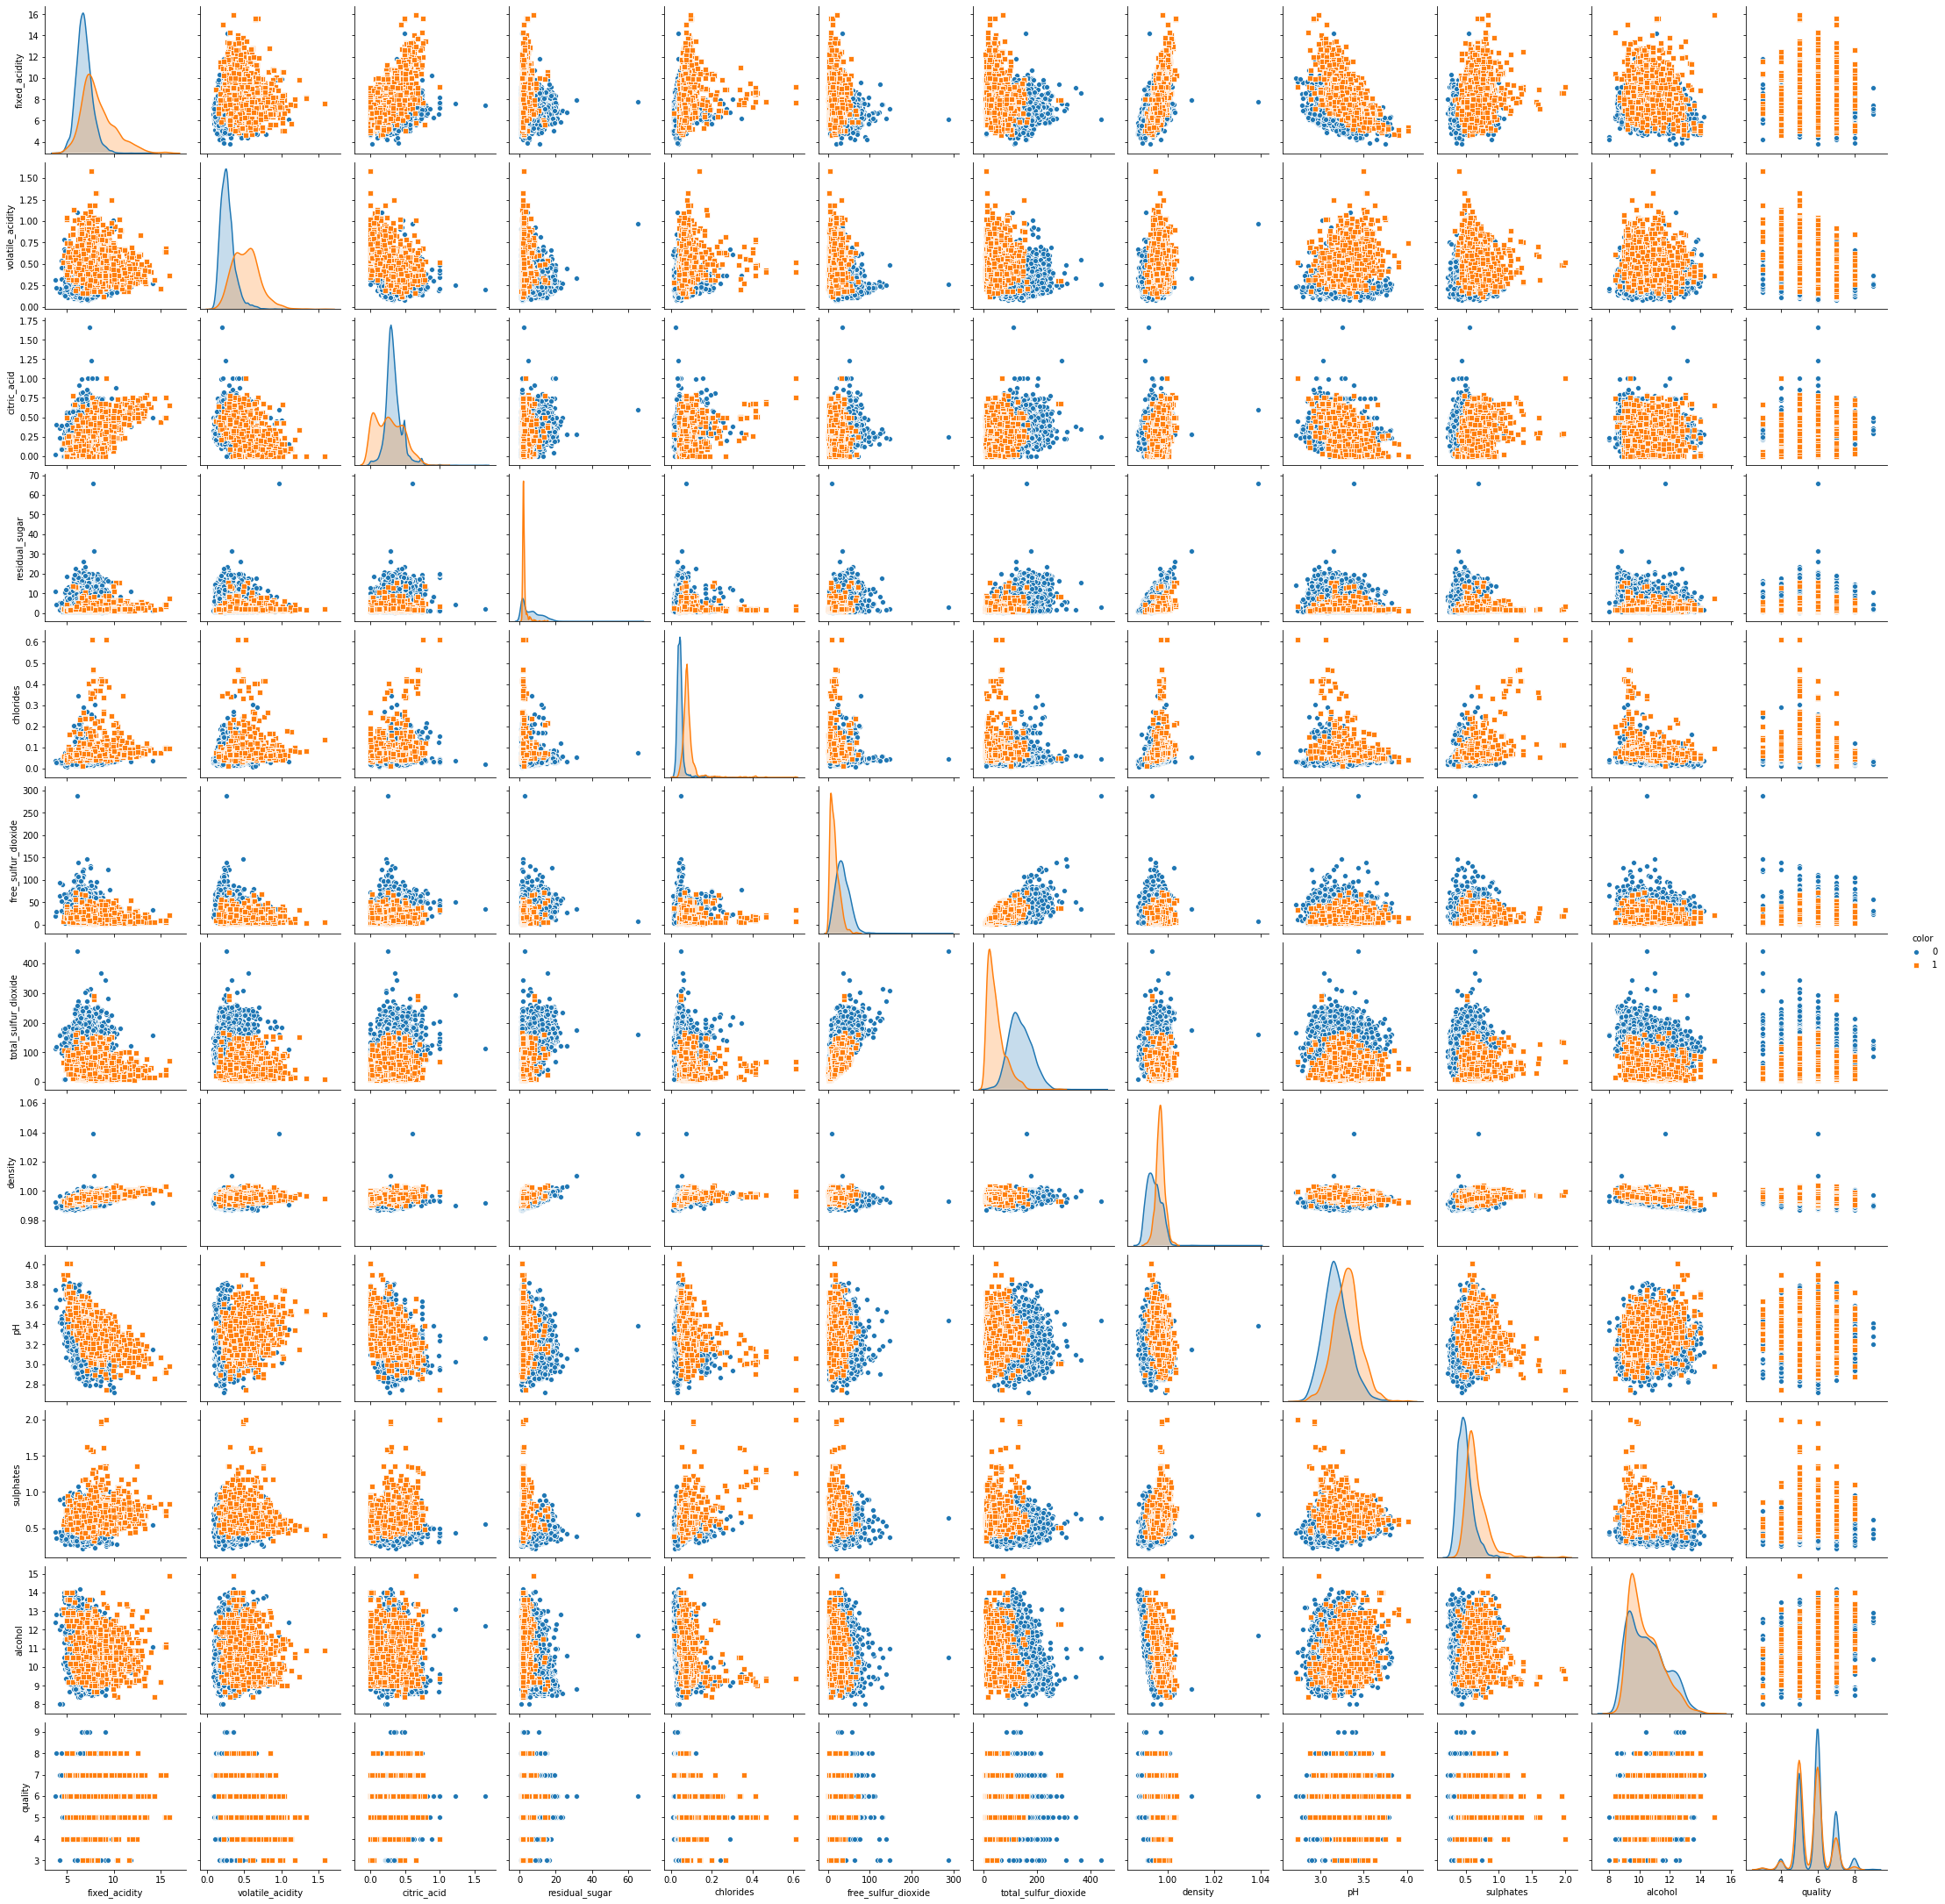

In [5]:
import seaborn as sns
sns.pairplot(data,hue='color',markers=['o','s'])
xcols=[i for i in data.columns if i!='color']
X_data=data[xcols]

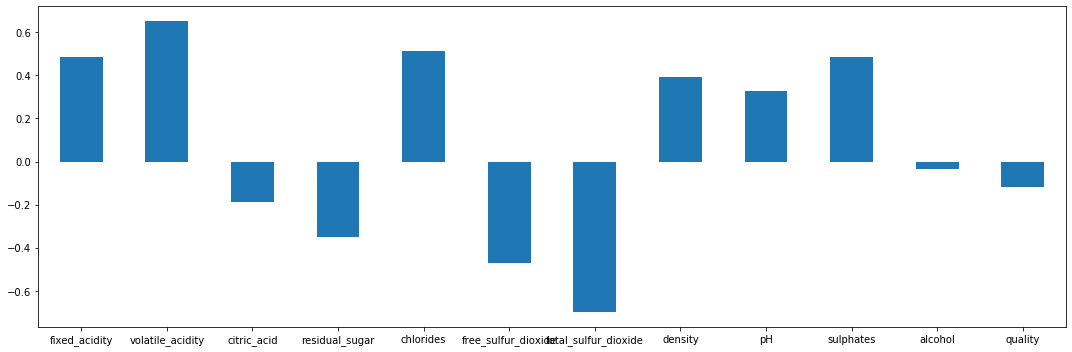

In [6]:
#bar plot
import matplotlib.pyplot as plt
%matplotlib inline

Y_data=data['color']
correlations=X_data.corrwith(Y_data)
plt.figure(figsize=(15,5))
correlations.plot.bar(rot=0)
# plt.tick_params(axis='x', which='major', labelsize=4)
plt.tight_layout()


In [7]:
abscorr=correlations.abs()
abscorr.sort_values(inplace=True)
xtop=abscorr.tail(2).index

In [8]:
corrcols=[i for i in xtop]
X=data[corrcols]
X

,volatile_acidity,total_sulfur_dioxide
0,0.70,34.0
1,0.88,67.0
2,0.76,54.0
3,0.28,60.0
4,0.70,34.0
...,...,...
6492,0.21,92.0
6493,0.32,168.0
6494,0.24,111.0
6495,0.29,110.0


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=corrcols)

In [10]:
X

,volatile_acidity,total_sulfur_dioxide
0,0.413333,0.064516
1,0.533333,0.140553
2,0.453333,0.110599
3,0.133333,0.124424
4,0.413333,0.064516
...,...,...
6492,0.086667,0.198157
6493,0.160000,0.373272
6494,0.106667,0.241935
6495,0.140000,0.239631


## Answer 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.


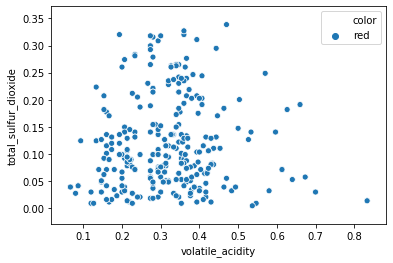

In [55]:
X_color=X[:300]
y_color=Y_data[:300]
y_color=y_color.apply(lambda x:'red' if x==1 else 'yellow')
# f,axes=plt.subplots(1,2,figsize=(11,5))
sns.scatterplot(X_color['volatile_acidity'],X_color['total_sulfur_dioxide'],hue=y_color)


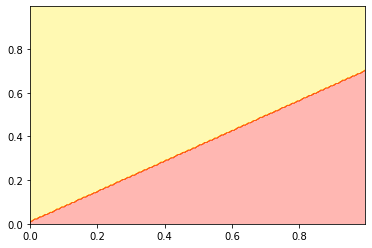

In [121]:
from sklearn.svm import LinearSVC
ax = plt.axes()

x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
ls=LinearSVC()
ls=ls.fit(X,data['color'])
y_grid_predictions = ls.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)


## Answer 3
Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the LinearSVC model you built.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try  
`Cs = [.1, 1, 10]`

In [145]:
Y=data['color']


def decisionboundry(X,y,model):
    ls=model.fit(X,y)
    X_color=X.sample(300)
    y_color = y.loc[X_color.index]
    y_color=y_color.apply(lambda x:'red' if x==1 else 'yellow')
    f,axes=plt.subplots(figsize=(10,10))
    axes.scatter(X_color['volatile_acidity'],X_color['total_sulfur_dioxide'],color=y_color)
#     ax = plt.axes()

    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = ls.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)
    axes.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    return 'yes'





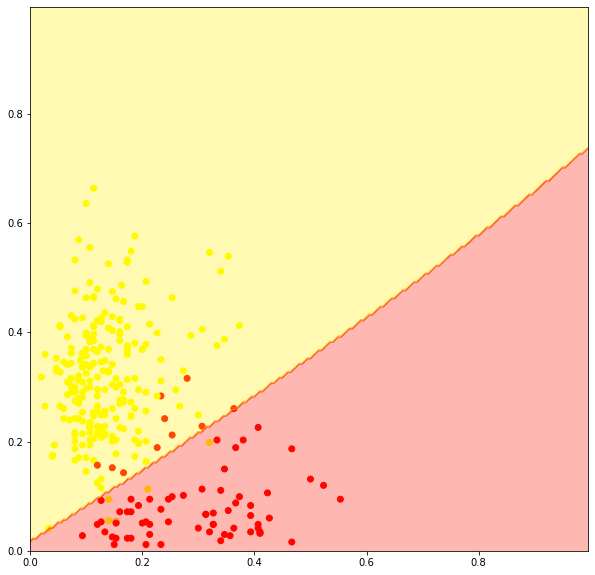

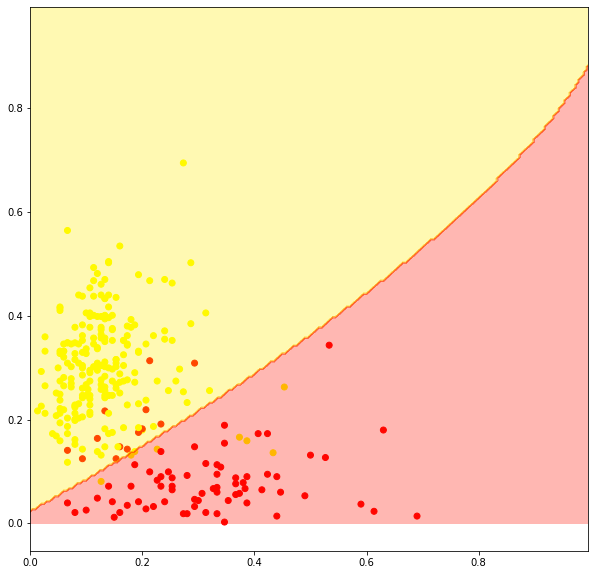

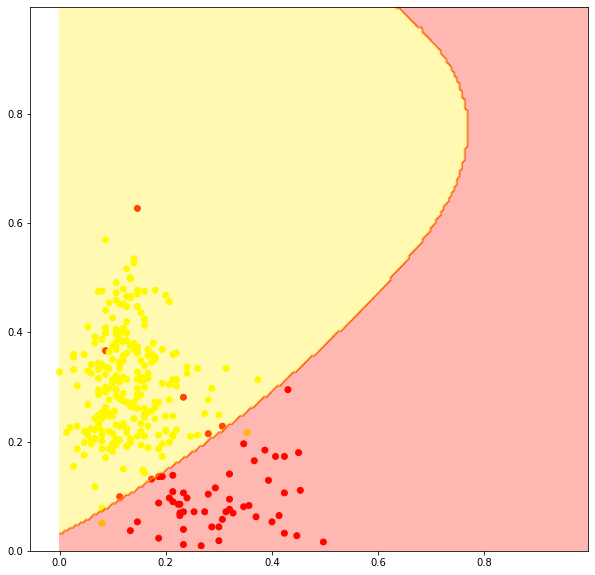

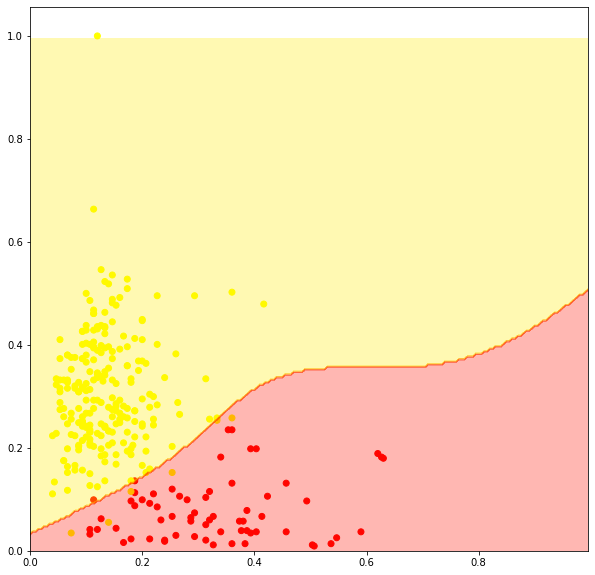

In [146]:
gammas = [.5, 1, 2, 10]
for i in gammas:
    svc=SVC(kernel='rbf',gamma=i)
    decisionboundry(X,Y,svc)

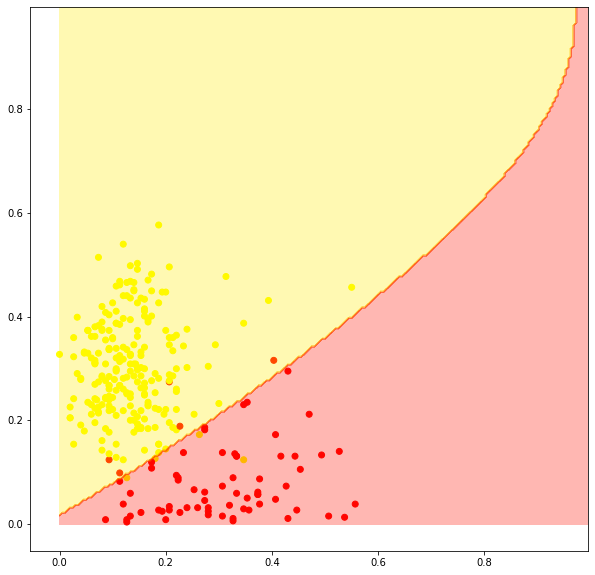

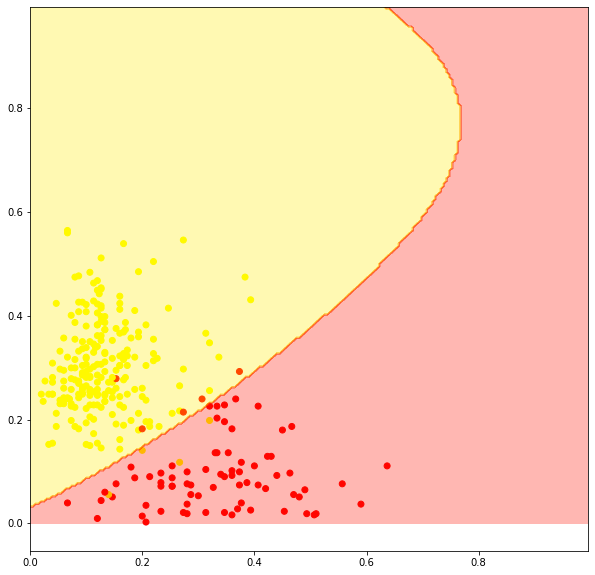

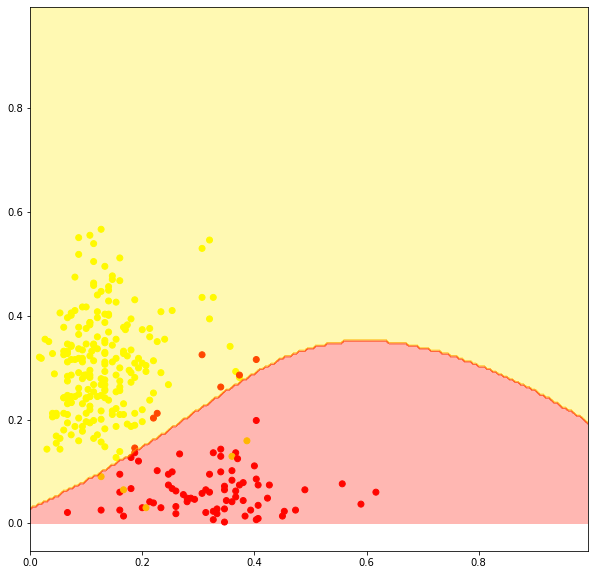

In [148]:
Cs = [.1, 1, 10]
for i in Cs:
    svc1=SVC(kernel='rbf',gamma=2,C=i)
    decisionboundry(X,Y,svc1)

## Answer 3A

Let's now fit a Polynomial kernel SVC with degree 3 and see how the decision boundary changes.

* Use the plot decision boundary function from the previous question and try the Polynomial Kernel SVC
* For various values of `C`, plot the decision boundary. You may try  
`Cs = [10,20,100,200]`
* Try to find out a C value that gives the best possible decision boundary

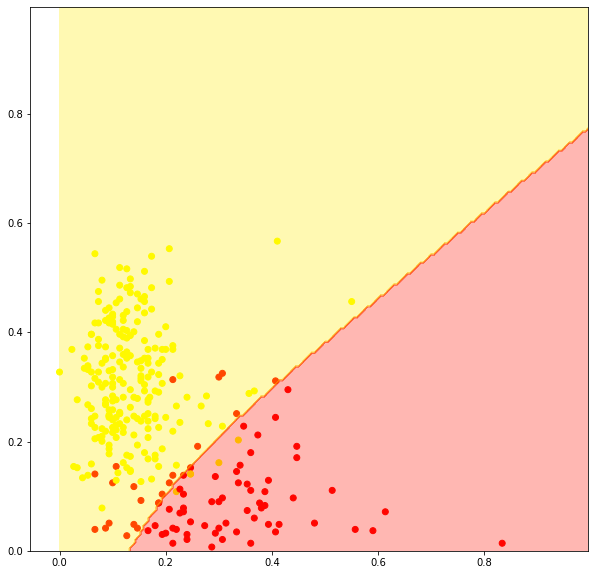

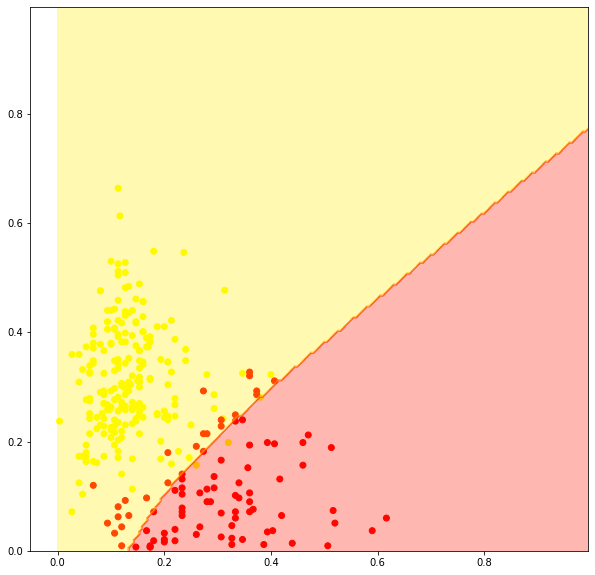

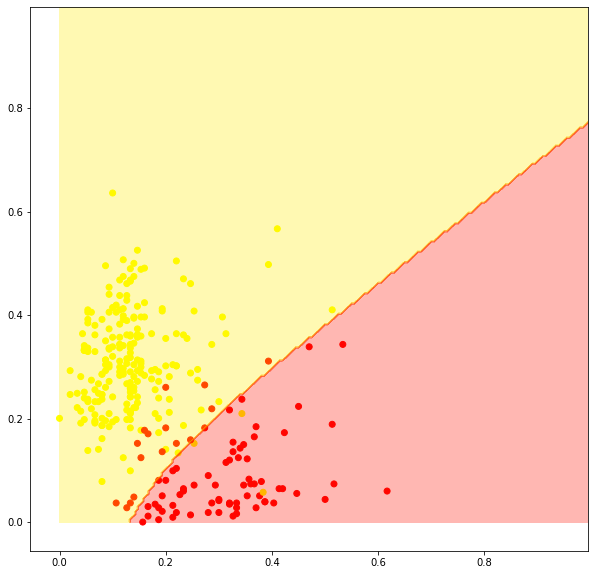

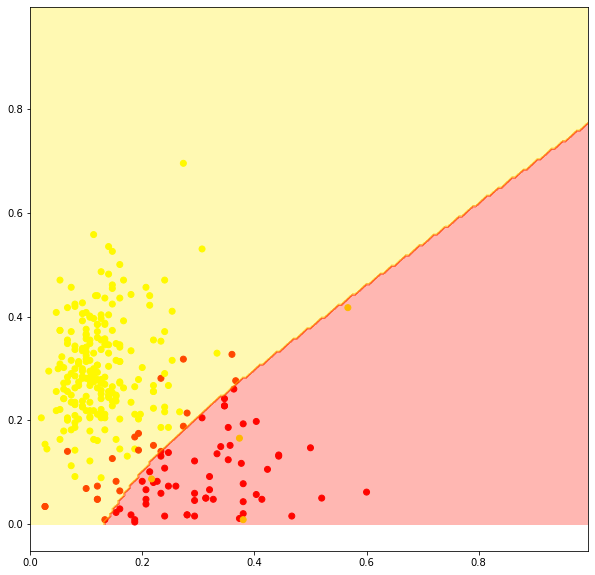

In [152]:
Cs = [10,20,100,200]
for i in Cs: 
    svp=SVC(kernel='poly',degree=3,C=i)
    decisionboundry(X,Y,svp)

## Answer 4

In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If you type **`%%timeit`** in the beginning of the cell, then it will run the whole cell and output the running time.

* Re-load the wine quality data if you made changes to the original.
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

## R & D
* why nystream? SGD?
* what they do? how different from linear svc?
* what is rbf ? gaussian cv?

In [197]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier
import time
y=data['color']
xcols=[i for i in data.columns]
X=data[xcols]





In [172]:
%%timeit
svc=SVC(kernel='rbf',gamma=2,C=10)
svc=svc.fit(X,y)


5.67 s ± 93.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [173]:
%%timeit
nystreamSVC= Nystroem (kernel='rbf', gamma=2.0,n_components=100)
nys=nystreamSVC.fit_transform(X,y)

92.2 ms ± 3.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [174]:
%%timeit
sgd=SGDClassifier()
sgd=sgd.fit(X,y)

48.6 ms ± 6.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [207]:
Xinc=pd.DataFrame()
Yinc=pd.Series()
for i in range(5):
    Xcpy=X.copy()
    Ycpy=y.copy()
    Xinc=pd.concat([Xcpy,Xinc],axis=0)
    Yinc=pd.concat([Ycpy,Yinc],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [208]:
%%timeit
nystreamSVC= Nystroem (kernel='rbf', gamma=2.0,n_components=100)
nys=nystreamSVC.fit_transform(Xinc,Yinc)

471 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [209]:
%%timeit
sgd=SGDClassifier()
sgd=sgd.fit(Xinc,Yinc)

432 ms ± 70.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [211]:
# %%timeit
# svc=SVC(kernel='rbf',gamma=2,C=10)
# svc=svc.fit(Xinc,Yinc)


## Answer 5
Try Tuning hyper-parameters for the svm kernal using GridSearchCV

* Take the complete dataset
* Define y as data.color = 'red'
* Remaining columns as X
* Do a test and train split
* Set parameters for cross validation. Do this for as many values of gamma and C
* Using gridsearchcv to run through the data using the various parameters values
* Get the mean and standard deviation on the set for the various combination of gamma and C values
* print the best parameters in the training set

## R & D
* why are we using gridsearch csv?
* why with many gamma ,c?
* what is gamma,C?


In [226]:
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.3,random_state=42)
svm=svm.SVC()
parameters={'gamma':[.5, 1, 2, 10],'C':[10,20,100,200]}
gscv=GridSearchCV(svm,parameters)
gscv=gscv.fit(X_train,Y_train)


In [239]:
print(gscv.best_params_)
print(gscv.cv_results_['mean_test_score'])
print(gscv.cv_results_['std_test_score'])

{'C': 10, 'gamma': 0.5}
[0.87156615 0.81878311 0.80184818 0.79635078 0.87156615 0.81878311
 0.80184818 0.79635078 0.87156615 0.81878311 0.80184818 0.79635078
 0.87156615 0.81878311 0.80184818 0.79635078]
[0.0086612  0.00587171 0.00550865 0.0064535  0.0086612  0.00587171
 0.00550865 0.0064535  0.0086612  0.00587171 0.00550865 0.0064535
 0.0086612  0.00587171 0.00550865 0.0064535 ]


## Answer 6
   Use the model from previous question to predict 
 
 * Perform the prediction on the test set  
 * Print confusion matrix, accuracy and classification report

## R & D
* why classification report?

In [240]:
ypred=gscv.predict(X_test)


In [243]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,ypred)

array([[1445,    3],
       [ 245,  257]], dtype=int64)

In [245]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,ypred)

0.8728205128205129

In [255]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,ypred,labels=[1,2]))

              precision    recall  f1-score   support

           1       0.99      0.51      0.67       502
           2       0.00      0.00      0.00         0

   micro avg       0.99      0.51      0.67       502
   macro avg       0.49      0.26      0.34       502
weighted avg       0.99      0.51      0.67       502

